<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_007_statistical__testing_goals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### **Goals of Statistical Testing**
1. **Compare Central Tendencies (e.g., Means, Medians)**:
   - Often used in experimental research to test hypotheses about group differences.
   - Example: "Does Drug A lower blood pressure more than Drug B?"

2. **Evaluate Variability**:
   - Testing for differences in variability (e.g., variances) can reveal insights about data consistency or group-specific characteristics.
   - Example: "Is the variability in test scores higher in one school compared to another?"

3. **Understand Relationships Between Variables**:
   - Correlation and regression analyses assess how variables are related.
   - Example: "Is there a relationship between hours studied and test scores?"

4. **Classify and Predict**:
   - Hypothesis testing may support classification or predictive modeling.
   - Example: "Can we predict customer churn based on monthly spending?"

5. **Test Assumptions**:
   - Many tests rely on assumptions (e.g., normality, equal variances). Assumption testing ensures the validity of subsequent analyses.
   - Example: Using Levene’s test to check variances before running ANOVA.

6. **Understand Distributions**:
   - Tests like the Shapiro-Wilk or Kolmogorov-Smirnov test assess if data is normally distributed, informing which statistical methods to use.
   - Example: "Is the sample data normally distributed, allowing for parametric tests?"

7. **Determine Significance**:
   - Testing often aims to identify statistically significant patterns or effects, distinguishing them from random variation.
   - Example: "Is the observed improvement in scores due to the intervention or random chance?"

---

### **When Testing Means is the End Goal**
- In experiments or comparative studies where the primary interest is to determine if groups differ:
   - Example: "Does fertilizer A produce higher crop yields than fertilizer B?"

### **When Testing Means is a Step in the Process**
- When the ultimate goal involves deeper insights:
   - Understanding group-specific characteristics (e.g., variance or shape of distribution).
   - Modeling relationships or making predictions.
   - Classifying or clustering data.

---

### **Key Takeaway**
Testing means is a common but not universal goal of statistical testing. It’s often a step toward a larger objective, such as understanding variability, relationships, or patterns in the data. By broadening the scope of your analysis, you gain a more comprehensive understanding of the data.


## Tests for Equality of Variances
---
### **1. Variance Analysis**
- **Levene’s Test**: Tests for equality of variances between groups. Useful as a precursor to t-tests or ANOVA.
- **F-Test**: Compares variances of two groups to test if they are significantly different.

---

### **2. Tests for Multiple Groups**
- **One-Way ANOVA**: Tests whether the means of three or more independent groups are equal.
  - Follow-up: Post-hoc tests like Tukey’s HSD to identify which groups differ.
- **Kruskal-Wallis Test**: Non-parametric alternative to one-way ANOVA for data not meeting normality assumptions.

### **Comparison of Levene’s Test and F-Test**

#### **1. Purpose**
- **Levene’s Test**: Tests for equality of variances across two or more groups. It is more general and can handle more than two groups.
- **F-Test**: Specifically compares the variances of **two groups only** to determine if they are significantly different.

---

#### **2. Assumptions**
- **Levene’s Test**:
  - Does not assume that the data is normally distributed, making it more robust to deviations from normality.
  - Works well for both small and large sample sizes.
- **F-Test**:
  - Assumes that the data in each group is normally distributed.
  - Can be sensitive to deviations from normality, especially with smaller sample sizes.

---

#### **3. Use Cases**
- **Levene’s Test**:
  - Appropriate when comparing **more than two groups** (e.g., variances of `sepal length` for `setosa`, `versicolor`, and `virginica`).
  - Used as a precursor to ANOVA to ensure equal variances.
- **F-Test**:
  - Best for comparing **exactly two groups** (e.g., variance of `sepal length` for `setosa` vs. `versicolor`).
  - Used when variances need to be evaluated directly between two groups.

---

#### **4. Statistical Outputs**
- Both tests produce:
  - A **test statistic**: Quantifies the ratio of variances or deviations.
  - A **p-value**: Indicates whether to reject the null hypothesis of equal variances.

---

#### **5. Robustness**
- **Levene’s Test**:
  - More robust to non-normal data and outliers because it uses a transformation based on the absolute deviations from the group means or medians.
- **F-Test**:
  - Less robust, highly sensitive to non-normality and outliers, potentially leading to misleading results if assumptions are violated.

---

### **Key Takeaways**
- Use **Levene’s Test** when comparing variances across multiple groups or when normality assumptions are questionable.
- Use the **F-Test** when comparing variances between two groups, especially if you are confident in the normality of the data.



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
# iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Levene's Test for Equality of Variances

### **Question**  
Do the variances of `sepal length` differ significantly between `setosa`, `versicolor`, and `virginica`?

---

### **Levene's Test for Equality of Variances**  
- **Null Hypothesis (\(H_0\))**: The variances of `sepal length` are equal across `setosa`, `versicolor`, and `virginica`.  
- **Alternative Hypothesis (\(H_1\))**: At least one group's variance is different from the others.  

---

### **Analysis and Interpretation**  
- The boxplot shows variability in the spread of `sepal length` across the three species.  
- The test statistic (\(6.35\)) indicates a noticeable difference in variance.  
- The p-value (\(0.0023\)) is below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that the variances of `sepal length` differ significantly between the three species.  



Levene's Test for Equality of Variances:
Test Statistic: 6.35
P-Value: 0.0023
Conclusion: Reject the null hypothesis. Variances differ significantly between groups.




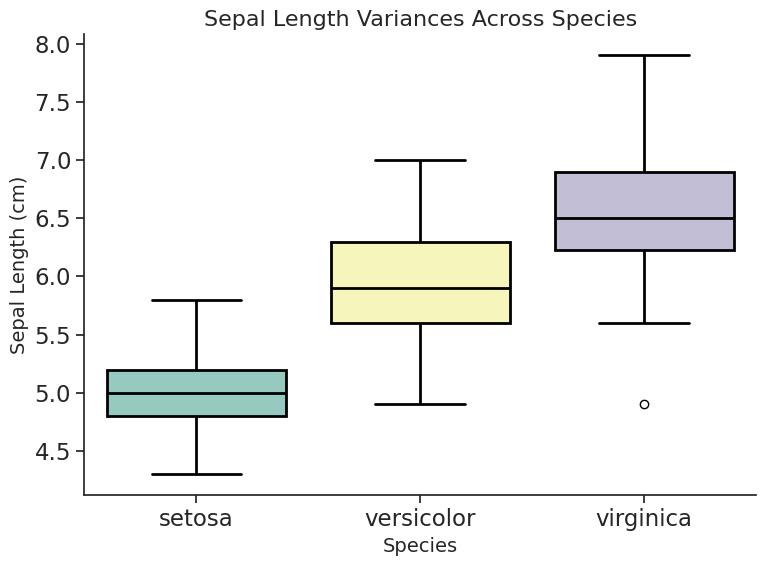

In [2]:
from scipy.stats import levene

# Set Seaborn theme, style, and palette
sns.set_theme(style="ticks", palette="Set3")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Extract sepal length data for each species
setosa_sepal_length = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal_length = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica_sepal_length = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

# Perform Levene's Test
stat, p_value = levene(setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length)

# Output results
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. Variances differ significantly between groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in variances between groups.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df, x='species', y='sepal length (cm)', hue='species',linewidth=2, linecolor='k')
plt.title("Sepal Length Variances Across Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Sepal Length (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


Based on the results of **Levene’s Test**, where the null hypothesis was rejected (p-value = 0.0023), we’ve determined that the variances in sepal length differ significantly between species. The next steps depend on your **goal for analysis**, typically to compare means.

---

### **Next Steps**
Since the assumption of equal variances is violated, proceed with methods that account for unequal variances:

---

#### **1. Comparing Means with Unequal Variances**
Use **Welch’s ANOVA**, a robust alternative to standard ANOVA, to compare the means across multiple groups without assuming equal variances.

---

#### **Why Welch’s ANOVA?**
- It relaxes the assumption of equal variances, making it suitable when variances differ significantly between groups.
- If the result of Welch’s ANOVA is significant, it indicates that at least one group mean is different.

---

#### **2. Follow-Up Post-Hoc Analysis**
If Welch’s ANOVA is significant (\(p < 0.05\)), perform **pairwise comparisons** between species means using **Games-Howell Post-Hoc Test**, which accounts for unequal variances and different sample sizes.

---

### **Summary of Steps**
1. **Determine Variances**:
   - Levene’s Test shows variances differ significantly (\(p = 0.0023\)).

2. **Perform Welch’s ANOVA**:
   - Compare group means while accounting for unequal variances.

3. **Conduct Post-Hoc Analysis**:
   - Use the Games-Howell Test to identify which specific group means differ.

4. **Visualize Results**:
   - Use boxplots or pairwise comparisons to enhance interpretation.



In [8]:
# !pip install pingouin

### **1. Welch’s ANOVA Results**

#### Interpretation:
- **F-Statistic**: \(F = 138.91\), a very high value, suggests strong evidence of differences between the group means.
- **p-unc**: \(p < 0.0001\) (e.g., \(1.51 \times 10^{-28}\)), far below \(\alpha = 0.05\), meaning the group means differ significantly.
- **Effect Size (np2)**: \(0.619\), which indicates that approximately 61.9% of the variance in sepal length is explained by species. This is a **large effect size**.

**Conclusion**:  
There is a statistically significant difference in sepal length means across species.


In [24]:
from scipy.stats import f_oneway
import pingouin as pg

# Perform Welch's ANOVA
welch_anova = pg.welch_anova(dv='sepal length (cm)', between='species', data=iris_df)

# Output results
print("Welch's ANOVA Results:\n")
print(welch_anova)
print('\n')
print('---'*25, '\n')

# Perform Games-Howell post-hoc test
games_howell = pg.pairwise_gameshowell(dv='sepal length (cm)', between='species', data=iris_df)

# Output results
print("Games-Howell Post-Hoc Results:\n")
games_howell


Welch's ANOVA Results:

    Source  ddof1      ddof2           F         p-unc       np2
0  species      2  92.211145  138.908285  1.505059e-28  0.618706


--------------------------------------------------------------------------- 

Games-Howell Post-Hoc Results:



,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,setosa,versicolor,5.006,5.936,-0.930,0.088395,-10.520986,86.538002,1.110223e-16,-2.088053
1,setosa,virginica,5.006,6.588,-1.582,0.102819,-15.386196,76.515867,1.498801e-14,-3.053629
2,versicolor,virginica,5.936,6.588,-0.652,0.115825,-5.629165,94.025486,5.572540e-07,-1.117195


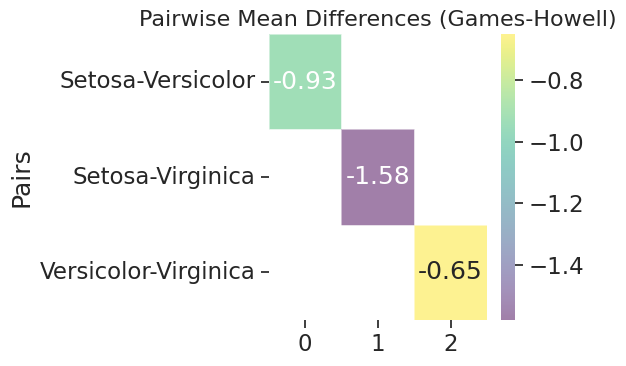

In [16]:
import numpy as np

# Prepare data for heatmap
diffs = np.array([-0.93, -1.58, -0.65])
pairs = ["Setosa-Versicolor", "Setosa-Virginica", "Versicolor-Virginica"]
heatmap_data = pd.DataFrame({'Pairs': pairs, 'Mean Difference': diffs}).pivot(columns='Pairs', values='Mean Difference')

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data.T, annot=True, cmap="viridis", fmt=".2f", cbar=True, linewidths=0.5, alpha=0.5)
plt.title("Pairwise Mean Differences (Games-Howell)", fontsize=16)
plt.tight_layout()
plt.show()



### **2. Games-Howell Post-Hoc Results**

The **Games-Howell Test** provides pairwise comparisons between the species to determine which specific groups have significantly different means.

#### Key Outputs:
- **A and B**: The two groups being compared.
- **mean(A) and mean(B)**: Mean sepal lengths for groups A and B.
- **diff**: Difference in means (\(\text{mean(B)} - \text{mean(A)}\)).
- **se**: Standard error of the difference.
- **T**: Test statistic for the comparison.
- **df**: Degrees of freedom for the test.
- **pval**: p-value for the comparison.
- **hedges**: Hedges’ \(g\), a measure of effect size for pairwise comparisons.

#### Pairwise Comparisons:
1. **Setosa vs. Versicolor**:
   - Mean difference: \(-0.93\)
   - p-value: \(< 0.0001\)
   - Conclusion: The mean sepal length of `setosa` is significantly smaller than that of `versicolor`.
   - Effect Size: Hedges’ \(g = -2.09\) (large effect size).

2. **Setosa vs. Virginica**:
   - Mean difference: \(-1.58\)
   - p-value: \(< 0.0001\)
   - Conclusion: The mean sepal length of `setosa` is significantly smaller than that of `virginica`.
   - Effect Size: Hedges’ \(g = -3.05\) (very large effect size).

3. **Versicolor vs. Virginica**:
   - Mean difference: \(-0.65\)
   - p-value: \(5.57 \times 10^{-7}\)
   - Conclusion: The mean sepal length of `versicolor` is significantly smaller than that of `virginica`.
   - Effect Size: Hedges’ \(g = -1.12\) (large effect size).

---

### **What to Look For**
1. **Welch’s ANOVA Results**:
   - Check the p-value (\(p-unc\)) to determine if there is an overall significant difference in means.
   - Significant results (\(p < 0.05\)) indicate you should proceed with post-hoc analysis.

2. **Games-Howell Post-Hoc Results**:
   - Look at the **p-value** for each pairwise comparison to determine which groups differ significantly.
   - Check the **effect size (Hedges’ \(g\))** to understand the magnitude of the differences:
     - \(g < 0.2\): Small effect.
     - \(g = 0.5\): Medium effect.
     - \(g \geq 0.8\): Large effect.




### **Interpreting Hedges' \(g\) in the Games-Howell Post-Hoc Results**

#### **What is Hedges' \(g\)?**
Hedges' \(g\) is a measure of **effect size**, which quantifies the magnitude of the difference between two group means in standardized units. Unlike p-values, which only tell you whether a difference is statistically significant, Hedges' \(g\) indicates the practical importance or **strength** of the difference.

---

#### **How to Interpret Hedges' \(g\)**
Hedges' \(g\) is calculated similarly to Cohen's \(d\), but it corrects for small sample sizes, making it more accurate when group sizes are unequal or small.

- **Effect Size Guidelines** (interpreted similarly to Cohen’s \(d\)):
  - \( g < 0.2 \): **Small effect** (negligible difference).
  - \( g = 0.5 \): **Medium effect** (moderate difference).
  - \( g \geq 0.8 \): **Large effect** (substantial difference).

- The **sign** of Hedges' \(g\) indicates the direction of the difference:
  - Negative values mean that Group A's mean is smaller than Group B's mean.
  - Positive values mean that Group A's mean is larger than Group B's mean.

---

#### **Results in Context**

1. **Setosa vs. Versicolor**:
   - Mean Difference: \(-0.93\)
   - Hedges' \(g = -2.09\):
     - This is a **very large effect size**, indicating a substantial difference in sepal lengths between `setosa` and `versicolor`.
     - The negative value shows that `setosa` has a smaller mean than `versicolor`.

2. **Setosa vs. Virginica**:
   - Mean Difference: \(-1.58\)
   - Hedges' \(g = -3.05\):
     - Another **very large effect size**, indicating that the difference in sepal lengths between `setosa` and `virginica` is even more substantial.
     - Again, the negative sign shows that `setosa` has a smaller mean than `virginica`.

3. **Versicolor vs. Virginica**:
   - Mean Difference: \(-0.65\)
   - Hedges' \(g = -1.12\):
     - A **large effect size**, showing a significant difference in sepal lengths between `versicolor` and `virginica`.
     - The negative sign indicates that `versicolor` has a smaller mean than `virginica`.

---

#### **Practical Implications**
- The Hedges' \(g\) values confirm that the differences between the groups are not only statistically significant but also **practically meaningful**.
- These results suggest substantial biological or observational differences between the species in terms of sepal length.

---

### **Summary**
- **Setosa vs. Virginica** has the largest effect size (\( g = -3.05 \)), indicating a substantial difference in sepal lengths.
- All pairwise comparisons show large or very large effects, meaning the differences are both statistically significant and practically meaningful.



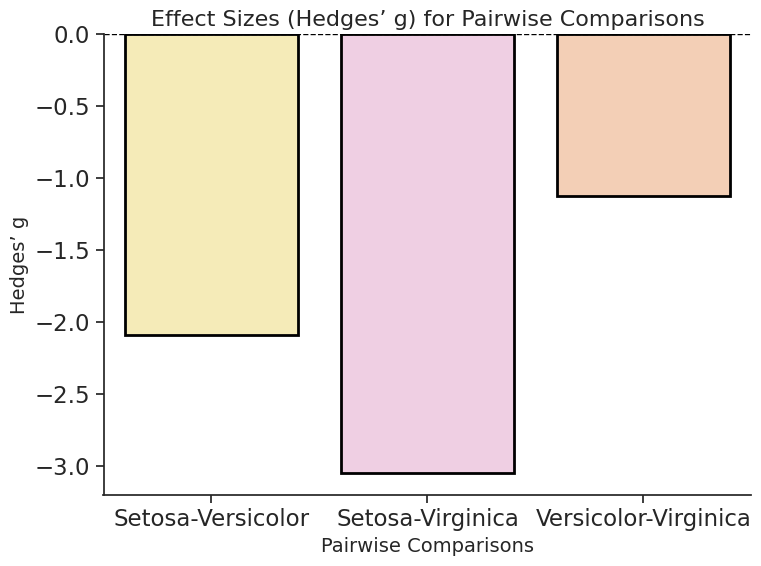

In [21]:
hedges = [-2.09, -3.05, -1.12]
labels = ["Setosa-Versicolor", "Setosa-Virginica", "Versicolor-Virginica"]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=hedges, hue=labels, palette="Pastel2_r", edgecolor='k', linewidth=2)
plt.xlabel("Pairwise Comparisons", fontsize=14)
plt.ylabel("Hedges’ g", fontsize=14)
plt.axhline(0, color='black', linewidth=1, linestyle="--")
plt.title("Effect Sizes (Hedges’ g) for Pairwise Comparisons", fontsize=16)
plt.xlabel("Pairwise Comparisons", fontsize=14)
plt.ylabel("Hedges’ g", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


### **What is Post-Hoc Analysis?**

Post-hoc analysis refers to additional tests conducted **after** finding significant results in an initial test (e.g., ANOVA) to pinpoint **which specific groups differ** from each other. While ANOVA tells you if at least one group differs, it does not identify **where** the differences lie. Post-hoc tests fill this gap.

---

### **Purpose of Post-Hoc Analysis**
1. **Identify Group Differences**:
   - Determine which pairs of groups have significantly different means.
2. **Control for Type I Error**:
   - Adjust for the fact that performing multiple comparisons increases the chance of falsely finding a significant difference (Type I error).

---

### **Common Post-Hoc Tests**
1. **Tukey’s Honest Significant Difference (HSD)**:
   - Assumes equal variances.
   - Tests all pairwise comparisons while controlling for Type I error.
   - Best for balanced designs with equal variances.

2. **Games-Howell Test**:
   - A robust test for unequal variances and unequal sample sizes.
   - Ideal when the assumption of homogeneity of variances is violated (e.g., based on Levene’s Test).

3. **Bonferroni Correction**:
   - Adjusts p-values by dividing the significance level (\(\alpha\)) by the number of comparisons.
   - Conservative approach that reduces Type I error but may lack power.

4. **Dunn’s Test**:
   - A non-parametric post-hoc test for comparing medians.
   - Suitable for non-normal data (e.g., following Kruskal-Wallis Test).

---

### **Choosing the Right Post-Hoc Test**
| **Condition**                     | **Recommended Test**        |
|------------------------------------|-----------------------------|
| Equal variances                   | Tukey’s HSD                 |
| Unequal variances                 | Games-Howell Test           |
| Non-parametric analysis (medians) | Dunn’s Test                 |
| Simple adjustment for comparisons | Bonferroni Correction       |

---

### **Example in the Current Context**

#### **Scenario**
- The Welch’s ANOVA result showed significant differences in sepal lengths among `setosa`, `versicolor`, and `virginica` (\( p < 0.05 \)).
- Since **variances differ significantly** (per Levene’s Test), a robust post-hoc test like the **Games-Howell Test** is appropriate.

---

### **What Post-Hoc Analysis Reveals**
Post-hoc analysis results typically include:
- **Pairwise Comparisons**:
   - Specific group pairs (e.g., `setosa` vs. `versicolor`).
- **Mean Differences**:
   - The numerical difference between the group means.
- **p-values**:
   - Indicates whether the difference between pairs is statistically significant.
- **Effect Size**:
   - Quantifies the practical significance of the difference.

---

### **Next Steps**
1. **Interpret Results**:
   - Look for significant p-values in the pairwise comparisons.
   - Identify which groups differ and by how much.
2. **Visualize Differences**:
   - Use boxplots, heatmaps, or pairwise comparison plots for clarity.
3. **Practical Implications**:
   - Relate the differences to your research question or hypothesis.

Would you like to focus on post-hoc results for your dataset or create visualizations to summarize the findings? Let me know!

In [25]:
#### **Post-Hoc Analysis: Games-Howell Test**

import pingouin as pg

# Perform Games-Howell post-hoc test
games_howell = pg.pairwise_gameshowell(dv='sepal length (cm)', between='species', data=iris_df)

# Output results
print("Games-Howell Post-Hoc Results:")
print(games_howell)


Games-Howell Post-Hoc Results:
            A           B  mean(A)  mean(B)   diff        se          T  \
0      setosa  versicolor    5.006    5.936 -0.930  0.088395 -10.520986   
1      setosa   virginica    5.006    6.588 -1.582  0.102819 -15.386196   
2  versicolor   virginica    5.936    6.588 -0.652  0.115825  -5.629165   

          df          pval    hedges  
0  86.538002  1.110223e-16 -2.088053  
1  76.515867  1.498801e-14 -3.053629  
2  94.025486  5.572540e-07 -1.117195  


Let’s perform these common post-hoc tests for pairwise comparisons based on your data. Here's how we can approach each one:

---

### **1. Tukey’s Honest Significant Difference (HSD)**

Tukey’s HSD assumes equal variances and performs pairwise comparisons between all groups.

### **Next Steps**
1. **Run the tests**: Execute the code for each test and share the results.
2. **Interpret Results**: Compare outputs to identify which groups differ significantly.
3. **Visualize Findings**: Use heatmaps, pairwise plots, or boxplots to communicate the results effectively.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


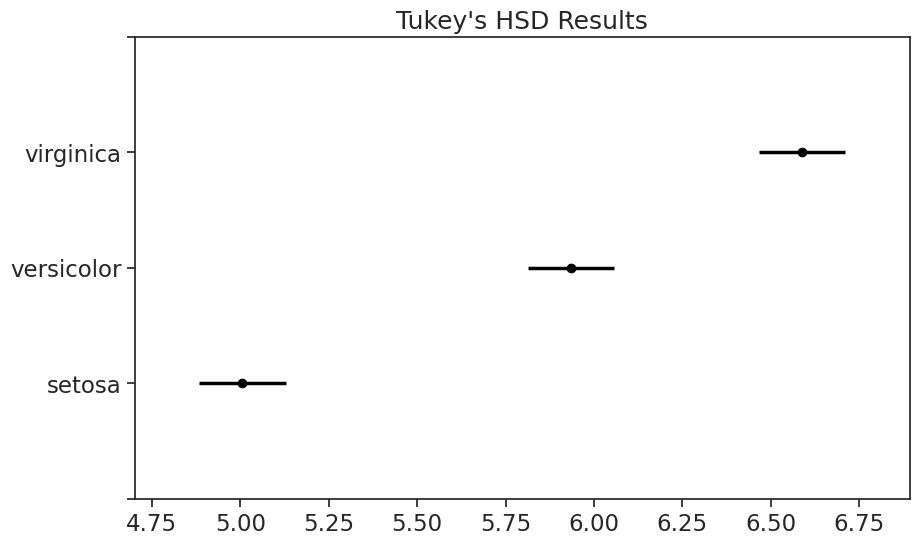

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey’s HSD test
tukey = pairwise_tukeyhsd(
    endog=iris_df['sepal length (cm)'],  # Dependent variable
    groups=iris_df['species'],          # Independent variable
    alpha=0.05                          # Significance level
)

# Output results
print(tukey)

# Visualization
tukey.plot_simultaneous()
plt.title("Tukey's HSD Results")
plt.show()


### **2. Games-Howell Test**

Games-Howell is robust to unequal variances and unequal sample sizes.


Games-Howell Test Results:
            A           B  mean(A)  mean(B)   diff        se          T  \
0      setosa  versicolor    5.006    5.936 -0.930  0.088395 -10.520986   
1      setosa   virginica    5.006    6.588 -1.582  0.102819 -15.386196   
2  versicolor   virginica    5.936    6.588 -0.652  0.115825  -5.629165   

          df          pval    hedges  
0  86.538002  1.110223e-16 -2.088053  
1  76.515867  1.498801e-14 -3.053629  
2  94.025486  5.572540e-07 -1.117195  





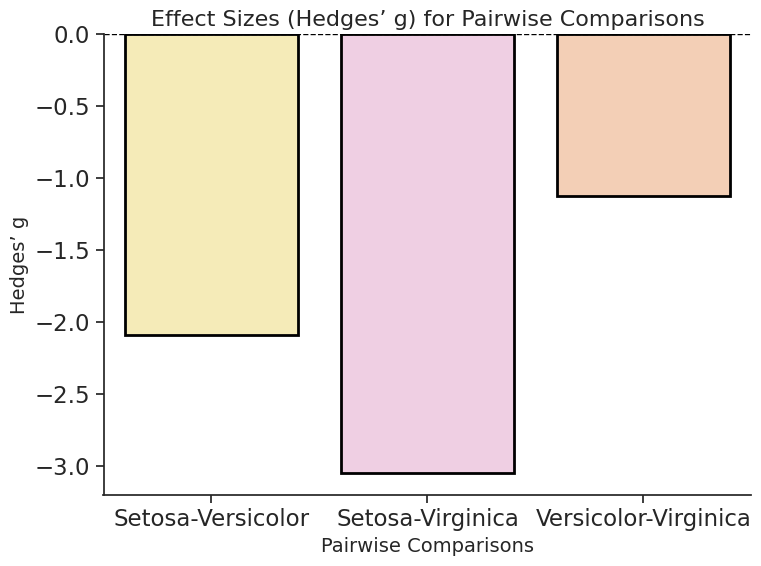

In [30]:
import pingouin as pg

# Perform Games-Howell post-hoc test
games_howell = pg.pairwise_gameshowell(dv='sepal length (cm)', between='species', data=iris_df)

# Output results
print("Games-Howell Test Results:")
print(games_howell)
print('\n\n')

hedges = [-2.09, -3.05, -1.12]
labels = ["Setosa-Versicolor", "Setosa-Virginica", "Versicolor-Virginica"]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=hedges, hue=labels, palette="Pastel2_r", edgecolor='k', linewidth=2)
plt.xlabel("Pairwise Comparisons", fontsize=14)
plt.ylabel("Hedges’ g", fontsize=14)
plt.axhline(0, color='black', linewidth=1, linestyle="--")
plt.title("Effect Sizes (Hedges’ g) for Pairwise Comparisons", fontsize=16)
plt.xlabel("Pairwise Comparisons", fontsize=14)
plt.ylabel("Hedges’ g", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

### **3. Bonferroni Correction**

Bonferroni adjusts the p-value threshold to control for multiple comparisons. It can be implemented with pairwise t-tests.



In [31]:
from scipy.stats import ttest_ind
from itertools import combinations

# Get all pairwise combinations of species
species = iris_df['species'].unique()
combinations = list(combinations(species, 2))

# Perform pairwise t-tests with Bonferroni correction
results = []
alpha = 0.05 / len(combinations)  # Adjusted alpha
for group1, group2 in combinations:
    data1 = iris_df[iris_df['species'] == group1]['sepal length (cm)']
    data2 = iris_df[iris_df['species'] == group2]['sepal length (cm)']
    t_stat, p_value = ttest_ind(data1, data2)
    results.append({'Group 1': group1, 'Group 2': group2, 'T-Statistic': t_stat, 'P-Value': p_value, 'Significant': p_value < alpha})

# Convert results to a DataFrame for easier viewing
bonferroni_df = pd.DataFrame(results)
print("Bonferroni Correction Results:")
print(bonferroni_df)

Bonferroni Correction Results:
      Group 1     Group 2  T-Statistic       P-Value  Significant
0      setosa  versicolor   -10.520986  8.985235e-18         True
1      setosa   virginica   -15.386196  6.892546e-28         True
2  versicolor   virginica    -5.629165  1.724856e-07         True


### **4. Dunn’s Test**

Dunn’s test is a non-parametric post-hoc method suitable for non-normal data and is often used after Kruskal-Wallis tests.




In [35]:
# !pip install scikit_posthocs

Dunn's Test Results:
                  setosa    versicolor     virginica
setosa      1.000000e+00  3.058513e-09  6.000296e-22
versicolor  3.058513e-09  1.000000e+00  8.324597e-04
virginica   6.000296e-22  8.324597e-04  1.000000e+00


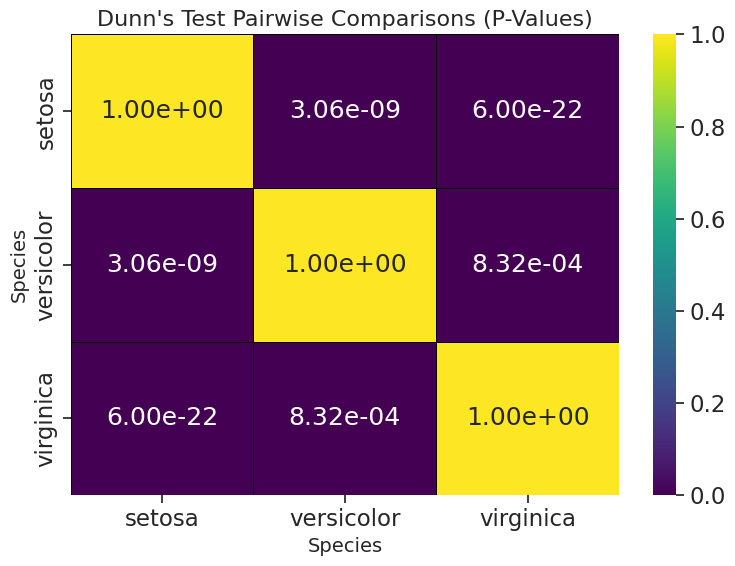

In [45]:
from scikit_posthocs import posthoc_dunn

# Perform Dunn’s Test with Bonferroni correction
dunn_results = posthoc_dunn(
    iris_df,
    val_col='sepal length (cm)',
    group_col='species',
    p_adjust='bonferroni'
)

# Output results
print("Dunn's Test Results:")
print(dunn_results)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    dunn_results,
    annot=True,
    fmt=".2e",
    cmap="viridis",
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)

# Customize the plot
plt.title("Dunn's Test Pairwise Comparisons (P-Values)", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Species", fontsize=14)
plt.tight_layout()
plt.show()
